In [1]:
import torch
import torch.utils.data as data
import torchvision.transforms as transforms
import torchvision.transforms.functional as TF
from torch.utils.data import Dataset
import torchvision as tv

import os, sys, re
from math import floor, ceil
import pandas as pd
import numpy as np
import pickle
from PIL import Image
# ImageFile.LOAD_TRUNCATED_IMAGES = True
# import spacy
# import scispacy
from tqdm import tqdm 
import time
from matplotlib import pyplot as plt
from skimage import io
import scipy.ndimage as ndimage
import cv2

# from nltk.tokenize import RegexpTokenizer
# from transformers import BertTokenizer

In [2]:
brk_img = ['/media/SStor1/zhanghex/MIMIC-CXR/physionet.org/files/mimic-cxr-jpg/2.0.0/files/p13/p13464967/s50918656/b9cef6bf-c247621e-4d6efec6-d0ae860e-bc40e3ae.jpg',
           '/media/SStor1/zhanghex/MIMIC-CXR/physionet.org/files/mimic-cxr-jpg/2.0.0/files/p19/p19792113/s58921676/8d6e531c-df0eef5f-1c5d1721-3d8aa78e-75615b36.jpg',
           '/media/SStor1/zhanghex/MIMIC-CXR/physionet.org/files/mimic-cxr-jpg/2.0.0/files/p19/p19725697/s50021487/077378a1-639e07ca-111795c0-426381a4-a527e0cb.jpg',
           '/media/SStor1/zhanghex/MIMIC-CXR/physionet.org/files/mimic-cxr-jpg/2.0.0/files/p15/p15451291/s55836342/37798b7c-cfc1ee44-960992d0-a8c8a727-ef3140dc.jpg',
           '/media/SStor1/zhanghex/MIMIC-CXR/physionet.org/files/mimic-cxr-jpg/2.0.0/files/p16/p16303240/s52712996/4b3bedfe-3241c91b-4a6d6d2c-ddcd30b8-a208ca6b.jpg',
           '/media/SStor1/zhanghex/MIMIC-CXR/physionet.org/files/mimic-cxr-jpg/2.0.0/files/p18/p18047173/s53663119/e0e4510b-c2763bf7-041bc48b-40b2a42e-bdf0439f.jpg',
           '/media/SStor1/zhanghex/MIMIC-CXR/physionet.org/files/mimic-cxr-jpg/2.0.0/files/p11/p11962176/s51118536/516646f1-817a14ba-a04a4bfc-4b6206f4-331e747e.jpg',
           '/media/SStor1/zhanghex/MIMIC-CXR/physionet.org/files/mimic-cxr-jpg/2.0.0/files/p11/p11051429/s51276026/1e8f7682-2efc9fd0-f8e53d04-538b66fd-5d2d88e1.jpg',
           '/media/SStor1/zhanghex/MIMIC-CXR/physionet.org/files/mimic-cxr-jpg/2.0.0/files/p10/p10001884/s58196907/702047a4-bc0d5902-5c6165ef-8edd29a4-23af9a3b.jpg',
           '/media/SStor1/zhanghex/MIMIC-CXR/physionet.org/files/mimic-cxr-jpg/2.0.0/files/p18/p18932705/s51445558/35deee8f-51ef556e-34b0e727-a1bad101-ffedab5d.jpg',
           '/media/SStor1/zhanghex/MIMIC-CXR/physionet.org/files/mimic-cxr-jpg/2.0.0/files/p13/p13423849/s52462600/9c9632b7-5810ff86-e8e9c4f4-2c4f4311-3e32811e.jpg',
           '/media/SStor1/zhanghex/MIMIC-CXR/physionet.org/files/mimic-cxr-jpg/2.0.0/files/p17/p17463554/s58095002/8ef5bd37-d3bb8c5e-24cd0186-cc986085-5f4d667b.jpg',
           '/media/SStor1/zhanghex/MIMIC-CXR/physionet.org/files/mimic-cxr-jpg/2.0.0/files/p12/p12834991/s59888625/8d35f44c-092bfdcc-7c12fcf4-79071a4e-3c976e29.jpg',
           '/media/SStor1/zhanghex/MIMIC-CXR/physionet.org/files/mimic-cxr-jpg/2.0.0/files/p17/p17629021/s53298954/6f40c6e1-6fb5c18f-9157c61f-b1fbae5a-6281aab7.jpg',
           '/media/SStor1/zhanghex/MIMIC-CXR/physionet.org/files/mimic-cxr-jpg/2.0.0/files/p17/p17496338/s52692894/abb24cff-82b544c2-f5ad96dd-26031eba-a39cc278.jpg',
           '/media/SStor1/zhanghex/MIMIC-CXR/physionet.org/files/mimic-cxr-jpg/2.0.0/files/p11/p11250458/s55756289/cf9288e7-cfa6cf2c-36454706-d3f8b617-935ac047.jpg',
           '/media/SStor1/zhanghex/MIMIC-CXR/physionet.org/files/mimic-cxr-jpg/2.0.0/files/p17/p17175688/s55829245/3b8a8bd8-7922028c-fd9f8959-a3a63639-01ae0720.jpg',
           '/media/SStor1/zhanghex/MIMIC-CXR/physionet.org/files/mimic-cxr-jpg/2.0.0/files/p17/p17463554/s58095002/8ef5bd37-d3bb8c5e-24cd0186-cc986085-5f4d667b.jpg',
           '/media/SStor1/zhanghex/MIMIC-CXR/physionet.org/files/mimic-cxr-jpg/2.0.0/files/p19/p19040738/s58695216/1e42526b-81677c4b-d4cc3556-2a6cc065-cd6a8c8e.jpg',
           '/media/SStor1/zhanghex/MIMIC-CXR/physionet.org/files/mimic-cxr-jpg/2.0.0/files/p10/p10123997/s50092158/f817146a-1c81d321-26430db8-7933249f-f54d672a.jpg',
           '/media/SStor1/zhanghex/MIMIC-CXR/physionet.org/files/mimic-cxr-jpg/2.0.0/files/p18/p18025609/s54177048/2298d1a4-c6b02a68-13a17662-7353c048-3db24770.jpg',
           '/media/SStor1/zhanghex/MIMIC-CXR/physionet.org/files/mimic-cxr-jpg/2.0.0/files/p11/p11962176/s51118536/516646f1-817a14ba-a04a4bfc-4b6206f4-331e747e.jpg',
           '/media/SStor1/zhanghex/MIMIC-CXR/physionet.org/files/mimic-cxr-jpg/2.0.0/files/p12/p12394964/s51836090/f038ece0-4989c037-ce4c9ab3-1724b55f-5e2340dc.jpg',
           '/media/SStor1/zhanghex/MIMIC-CXR/physionet.org/files/mimic-cxr-jpg/2.0.0/files/p14/p14462350/s53317645/f1b5ca06-f5593e8f-253da0cf-8a7c6eaf-a9757466.jpg',
           '/media/SStor1/zhanghex/MIMIC-CXR/physionet.org/files/mimic-cxr-jpg/2.0.0/files/p19/p19361635/s54577638/01400adc-c22c266f-55849f2b-7f41d5e4-f87c352b.jpg',
           '/media/SStor1/zhanghex/MIMIC-CXR/physionet.org/files/mimic-cxr-jpg/2.0.0/files/p15/p15928227/s56577519/87e953a1-87022837-eec6fcbf-7eb74b3a-ff529770.jpg',
           '/media/SStor1/zhanghex/MIMIC-CXR/physionet.org/files/mimic-cxr-jpg/2.0.0/files/p15/p15117669/s58254928/5972c234-55ad41ae-fd6d354d-cee2b0e7-f22a935d.jpg',
           '/media/SStor1/zhanghex/MIMIC-CXR/physionet.org/files/mimic-cxr-jpg/2.0.0/files/p18/p18047173/s53663119/e0e4510b-c2763bf7-041bc48b-40b2a42e-bdf0439f.jpg',
           '/media/SStor1/zhanghex/MIMIC-CXR/physionet.org/files/mimic-cxr-jpg/2.0.0/files/p19/p19462518/s58215267/c353aa47-8dce54e0-2b8fcd93-538ab73b-bb4de278.jpg',
]
           


In [6]:
np.random.uniform()

0.7102486707875746

In [31]:
## check images here
# prefix = '/media/SStor1/zhanghex/MIMIC-CXR/physionet.org/files/mimic-cxr-jpg/2.0.0'
# prefix = '/media/MyDataStor2/MIMIC-CXR/physionet.org/files/mimic-cxr-jpg/2.0.0'
# pths = '/media/MyDataStor2/OpenI_samples/3993_IM-2044-1002.dcm.png'
# imgp = 'files/p10/p10368327/s54891162/2cabe06c-89c27d3f-7ed0bde9-e1264940-71d0770b.jpg'
# imgp = 'files/p15/p15826372/s52340889/ce840271-6df21667-c7506e69-cc06839b-16735c5f.jpg'
# imgp = 'files/p15/p15477318/s55567307/ba6b9957-1eacc2a2-e0edb5cc-c679c12c-ee726d1a.jpg'
# imgp = 'files/p10/p10534245/s52330160/cf52095d-dc314a1b-99d09290-c2284811-ee729d0b.jpg'
i = 0
pths = brk_img[i]
# imgp = 'files/p12/p12000146/s52988409/d75aa7c2-d18d783b-d5932b2f-568067e4-746c2426.jpg'
# imgp = img_jpg[8]['img']
# pths = os.path.join(prefix, imgp)
try:
    with Image.open(pths) as img:
#         img = Image.open(im)
        print(img.size)
        print(img.format)
#     img = np.array(img)
# img = Image.open(pths.replace('SStor1/zhanghex', 'MyDataStor2'))
# img = Image.open(os.path.join('/home/zhanghex/forsake', os.path.basename(pths)))
        tar_fd = os.path.dirname(pths.replace('/media/SStor1/zhanghex/MIMIC-CXR','/home/zhanghex/forsake'))
        if not os.path.exists(tar_fd):
            os.makedirs(tar_fd)
        img.save(os.path.join(tar_fd, os.path.basename(pths).replace('jpg','png')), format='png')
#     cv2.imwrite(os.path.join(tar_fd, os.path.basename(pths).replace('jpg','png')), img)
# img.close()
# img = cv2.imread(pths)
# img
# fig = plt.figure(figsize=(8,8))
# img = np.array(img)
# plt.imshow(img, cmap='gray')
except Exception as e:
    print(e)
    print(pths)

(3056, 2544)
JPEG


In [ ]:
i = 0
pths = brk_img[i]
img = Image.open(pths.replace('/media/SStor1/zhanghex/MIMIC-CXR','/home/zhanghex/forsake').replace('jpg','png'))
print(img.size)
print(img.format)

In [2]:
img_jpg = [
    {'img':'files/p19/p19017919/s50797181/8e5f8df3-4248d575-fd16f8c1-1c69065a-1ac199e9.jpg', 'txt':1},
    {'img':'files/p18/p18441078/s58044074/15e60dc7-6493889f-d2cb9dba-2c860709-f171bc98.jpg', 'txt':2},
    {'img':'files/p11/p11673861/s53517205/0491306a-d44bb1cd-36678cdf-ef64aa11-ee9897a2.jpg', 'txt':3},
    {'img':'files/p15/p15398519/s52897917/6f9899f3-652a0fe6-cb32f8b1-3afb0c85-5a3929f0.jpg', 'txt':4},
    {'img':'files/p13/p13118941/s54144739/67b68818-61703959-6321083a-ecf0ff32-addd5bc8.jpg', 'txt':5},
    {'img':'files/p13/p13660399/s52532898/2f2d7a89-161059ab-bf24aaa4-c15f7abb-ea408fee.jpg', 'txt':6},
    {'img':'files/p14/p14882082/s59150331/5009240f-7dc4006c-4a69d332-00051c01-9179f001.jpg', 'txt':7},
    {'img':'files/p17/p17198774/s54162995/2d7e35ed-6f80d557-740804a5-c1cdc6f0-5729e6a6.jpg', 'txt':8},
    {'img':'files/p17/p17199342/s59731194/b3e8c46c-99efe614-59b11837-a870ab41-8e30ceea.jpg', 'txt':9},
    {'img':'files/p18/p18446282/s54914372/32b63c6b-837955f2-62cd29e6-834d5132-6f9c67d8.jpg', 'txt':10},
    {'img':'files/p11/p11285576/s54979966/03b2e67c-70631ff8-685825fb-6c989456-621ca64d.jpg', 'txt':11},
    {'img':'files/p11/p11378535/s50374044/db9511e3-ee0359ab-489c3556-4a9b2277-c0bf0369.jpg', 'txt':12},
#     {'img':'files/p14/p14887088/s54257662/1bc85033-355accce-e8d0ed50-78188cd3-dac92e86.jpg', 'txt':13},
#     {'img':}
]
## /media/MyDataStor2/MIMIC-CXR/physionet.org/files/mimic-cxr-jpg/2.0.0/files/p18/p18046197/s54101455/03282542-659da086-ed15e343-f5666add-32d57195.jpg

img_png = [
    {'img':'3993_IM-2044-1002.dcm.png', 'txt':1},
    {'img':'3994_IM-2045-1001.dcm.png', 'txt':2},
    {'img':'3994_IM-2045-2001.dcm.png', 'txt':3},
    {'img':'3995_IM-2046-1001.dcm.png', 'txt':4},
    {'img':'3995_IM-2046-2001.dcm.png', 'txt':5},
    {'img':'3996_IM-2047-1001.dcm.png', 'txt':6},
    {'img':'3996_IM-2047-3001.dcm.png', 'txt':7},
    {'img':'3997_IM-2048-1001.dcm.png', 'txt':8},
    {'img':'3997_IM-2048-1002.dcm.png', 'txt':9},
    {'img':'3998_IM-2048-1001.dcm.png', 'txt':10},
    {'img':'3998_IM-2048-1002.dcm.png', 'txt':11},
    {'img':'3999_IM-2049-1001.dcm.png', 'txt':12},
#     {'img':'3999_IM-2049-2001.dcm.png', 'txt':13},
#     {'img':}
]

In [69]:
## custom functions for transforms using skimage and scipy

class RandomTranslateCrop(object):
    """Translate and crop the image in a sample.
    Args:
        output_size (tuple or int): Desired output size. 
        If int, square crop is made.
    """

    def __init__(self, output_size, shift_mean=0,
                 shift_std=200, rotation_mean=0, rotation_std=10):
        assert isinstance(output_size, (int, tuple))
        if isinstance(output_size, int):
            self.output_size = (output_size, output_size)
        else:
            assert len(output_size) == 2
            self.output_size = output_size
        self.shift_mean = shift_mean
        self.shift_std = shift_std
        self.rotation_mean = rotation_mean
        self.rotation_std = rotation_std

    def __call__(self, image):
        image = self.__translate_2Dimage(image)
#         image = self.__rotate_2Dimage(image)
        h, w = image.shape[0:2]
        new_h, new_w = self.output_size

        if new_h>h or new_w>w:
            raise ValueError('This image needs to be padded!')

        top = floor((h - new_h) / 2)
        down = top + new_h
        left = floor((w - new_w) / 2)
        right = left + new_w
        
        return image[top:down, left:right]

    def __translate_2Dimage(self, image):
        'Translate 2D images as data augmentation'
        h, w = image.shape[0:2]
        h_output, w_output = self.output_size[0:2]

        # Generate random Gaussian numbers for image shift as data augmentation
        shift_h = int(np.random.normal(self.shift_mean, self.shift_std))
        shift_w = int(np.random.normal(self.shift_mean, self.shift_std))
        if abs(shift_h) > 2 * self.shift_std:
            shift_h = 0
        if abs(shift_w) > 2 * self.shift_std:
            shift_w = 0

        # Pad the 2D image
        pad_h_length = max(0, float(h_output - h))
        pad_h_length_1 = floor(pad_h_length / 2) + 4  # 4 is extra padding
        pad_h_length_2 = floor(pad_h_length / 2) + 4  # 4 is extra padding
        pad_h_length_1 = pad_h_length_1 + max(shift_h , 0)
        pad_h_length_2 = pad_h_length_2 + max(-shift_h , 0)

        pad_w_length = max(0, float(w_output - w))
        pad_w_length_1 = floor(pad_w_length / 2) + 4  # 4 is extra padding
        pad_w_length_2 = floor(pad_w_length / 2) + 4  # 4 is extra padding
        pad_w_length_1 = pad_w_length_1 + max(shift_w , 0)
        pad_w_length_2 = pad_w_length_2 + max(-shift_w , 0)

        image = np.pad(image, ((pad_h_length_1, pad_h_length_2), (pad_w_length_1, pad_w_length_2)),
                       'constant', constant_values=((0, 0), (0, 0)))

        return image

    def __rotate_2Dimage(self, image):
        'Rotate 2D images as data augmentation'

        # Generate a random Gaussian number for image rotation angle as data augmentation
        angle = np.random.normal(self.rotation_mean, self.rotation_std)
        if abs(angle) > 2 * self.rotation_std:
            angle = 0
            return image

        return ndimage.rotate(image, angle)


class CenterCrop(object):
    """Crop randomly the image in a sample.
    Args:
        output_size (tuple or int): Desired output size. 
        If int, square crop is made.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        if isinstance(output_size, int):
            self.output_size = (output_size, output_size)
        else:
            assert len(output_size) == 2
            self.output_size = output_size

    def __call__(self, image):
        image = self.__pad_2Dimage(image)
        h, w = image.shape[0:2]
        new_h, new_w = self.output_size

        if new_h>h or new_w>w:
            raise ValueError('This image needs to be padded!')

        top = floor((h - new_h) / 2)
        down = top + new_h
        left = floor((w - new_w) / 2)
        right = left + new_w
        
        return image[top:down, left:right]
    
    def __pad_2Dimage(self, image):
        'Pad 2D images to match output_size'
        h, w = image.shape[0:2]
        h_output, w_output = self.output_size[0:2]

        pad_h_length = max(0, float(h_output - h))
        pad_h_length_1 = floor(pad_h_length / 2) + 4  # 4 is extra padding
        pad_h_length_2 = floor(pad_h_length / 2) + 4  # 4 is extra padding

        pad_w_length = max(0, float(w_output - w))
        pad_w_length_1 = floor(pad_w_length / 2) + 4  # 4 is extra padding
        pad_w_length_2 = floor(pad_w_length / 2) + 4  # 4 is extra padding

        image = np.pad(image, ((pad_h_length_1, pad_h_length_2), (pad_w_length_1, pad_w_length_2)),
                       'constant', constant_values=((0, 0), (0, 0)))

        return image
    
    
class ConvertTensor(object):
    """Convert the numpy image to Tensor.
    """
    def __call__(self, image):
        image = torch.tensor(image)
        image = image.unsqueeze(0)
        return image
    
    
# Load an .npy or .png image 
def load_image(img_path):
    if img_path[-3:] == 'npy':
        image = np.load(img_path)
    if img_path[-3:] == 'png' or img_path[-3:] == 'jpg':
        image = io.imread(img_path)
        image = image.astype(np.float32)
        image = image/np.max(image)
    return image

In [107]:
MAX_DIM = 2048

class TestDataset(Dataset):
    def __init__(self, root, dataset):
        super().__init__()
        
        self.root = root
        self.transform = tv.transforms.Compose([
#                                         tv.transforms.RandomRotation(10),
                                        tv.transforms.RandomCrop(MAX_DIM, pad_if_needed=True),
                                        tv.transforms.ColorJitter(brightness=[0.5, 1.8]
                                                                  , contrast=[0.5, 1.8]
                                                                  , saturation=[0.5, 1.8]),
#                                         RandomTranslateCrop(MAX_DIM), # skimage
#                                         tv.transforms.CenterCrop(MAX_DIM),
#                                         CenterCrop(MAX_DIM), # skimage
#                                         ConvertTensor(), # skimage
                                        tv.transforms.ToTensor(),
                                        tv.transforms.Normalize(0.5, 0.5)])
        self.datadict = dataset

    def __len__(self):
        return len(self.datadict)

    def __getitem__(self, idx):
        
        image_path = os.path.join(self.root, self.datadict[idx]['img'])

        try:
            image = Image.open(image_path)
#             image = load_image(image_path)
            if self.transform:
                image = self.transform(image)

        except Exception as ex:
            print(ex)
            print(image_path)
            return None
        
        text = self.datadict[idx]['txt']

        return image, text, os.path.basename(image_path)

In [42]:
def collate_fn_ignore_none(batch):
    batch = list(filter(lambda x: x is not None, batch))
    return torch.utils.data.dataloader.default_collate(batch)

In [109]:
root = '/media/MyDataStor2/MIMIC-CXR/physionet.org/files/mimic-cxr-jpg/2.0.0'
# root = '/media/MyDataStor2/OpenI_samples'
testset = TestDataset(root, img_jpg)
# print(len(testset))
testloader = torch.utils.data.DataLoader(testset, collate_fn=collate_fn_ignore_none, shuffle=False, batch_size=12, num_workers=0)

In [112]:
start_time = time.time()
for image, text, pth in testloader:
    continue
#     print(image.shape, text.shape, len(pth), sep='\n')
#     for i in range(len(pth)):
#         print('%02d - %s' % (text[i], pth[i]))
end_time = time.time()
end_time - start_time

0.9611063003540039

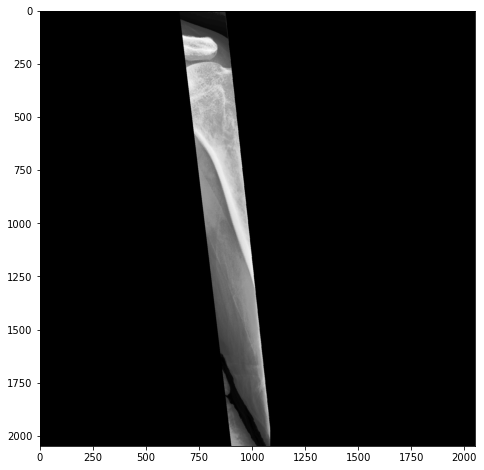

In [64]:
fig = plt.figure(figsize=(8,8))
i = 11
img = image[i,0].numpy()
plt.imshow(img, cmap='gray')

## Check dataloader

In [40]:
from importlib import reload
import dataset_mimic_all
reload(dataset_mimic_all)
from dataset_mimic_all import build_dataset
from misc.config import Config

cfg  = Config()

In [43]:
data_set = build_dataset('train', cfg)
train_loader = torch.utils.data.DataLoader(
                data_set, batch_size=cfg.batch_size, 
                collate_fn=collate_fn_ignore_none, drop_last=True,
                shuffle=True, num_workers=0)

In [44]:
idx2word = data_set.idx2word

In [45]:
data_set.vocab_size

8411

In [46]:
data_set.idx_to_class

{0: 'Atelectasis',
 1: 'Cardiomegaly',
 2: 'Consolidation',
 3: 'Edema',
 4: 'Enlarged Cardiomediastinum',
 5: 'Fracture',
 6: 'Lung Lesion',
 7: 'Lung Opacity',
 8: 'No Finding',
 9: 'Pleural Effusion',
 10: 'Pleural Other',
 11: 'Pneumonia',
 12: 'Pneumothorax',
 13: 'Support Devices'}

In [48]:
cnt = 0
for image, caption, cap_mask, label, uid, cap_lens in train_loader:
    print(image.shape, label.shape, caption.shape, cap_mask.shape, cap_lens.shape, len(uid))
    print(label.dtype)
    cnt += 1
    if cnt == 1:
        break

torch.Size([32, 1, 2048, 2048]) torch.Size([32, 14]) torch.Size([32, 160]) torch.Size([32, 160]) torch.Size([32]) 32
torch.float32


In [75]:
mm = cap_mask[0, :-1]
print(mm)
print(len(mm))
print(mm.numpy().sum())

tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, 

In [86]:
rnd = torch.Tensor(np.random.randint(0, 10, 160))
rnd

tensor([7., 8., 1., 8., 4., 8., 7., 2., 9., 1., 1., 1., 9., 5., 9., 0., 4., 3.,
        3., 5., 6., 4., 8., 9., 0., 2., 2., 6., 5., 7., 7., 5., 5., 3., 3., 8.,
        6., 2., 0., 4., 7., 1., 2., 9., 9., 9., 5., 4., 8., 1., 5., 2., 1., 2.,
        5., 3., 0., 6., 8., 2., 3., 0., 3., 8., 8., 4., 1., 4., 4., 4., 1., 1.,
        4., 1., 1., 2., 1., 8., 4., 8., 2., 7., 1., 5., 0., 6., 2., 6., 4., 6.,
        4., 9., 5., 5., 3., 8., 5., 8., 9., 0., 1., 5., 2., 2., 8., 1., 0., 7.,
        2., 5., 2., 8., 7., 2., 1., 0., 2., 2., 5., 0., 3., 9., 6., 3., 2., 0.,
        1., 6., 7., 3., 3., 5., 2., 9., 3., 4., 8., 8., 0., 4., 8., 3., 1., 3.,
        1., 2., 2., 2., 6., 4., 0., 8., 1., 1., 9., 6., 4., 4., 6., 0.])

52961869 84
[1, 72, 43, 87, 88, 40, 22, 74, 256, 453, 22, 56, 45, 334, 494, 43, 57, 327, 7, 8, 9, 10, 11, 12, 54, 55, 5, 540, 327, 328, 54, 131, 29, 469, 1286, 1592, 107, 22, 449, 1071, 40, 22, 79, 779, 43, 79, 472, 22, 82, 5, 316, 267, 22, 318, 5, 321, 119, 530, 148, 22, 121, 2226, 167, 258, 793, 183, 180, 694, 107, 22, 617, 40, 22, 121, 410, 97, 151, 327, 328, 54, 131, 6, 111, 2]
[CLS] frontal and lateral views of the chest were obtained the lungs are well expanded and clear without focal consolidation pleural effusion or pneumothorax pulmonary vasculature is engorged without overt pulmonary edema left pacemaker leads end in the expected locations of the right atrium and right ventricle the heart is moderate enlarged the aorta is tortuous as described on the prior reports but comparison can not be made in the absence of the prior images vascular congestion without overt pulmonary edema no pneumonia [SEP]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


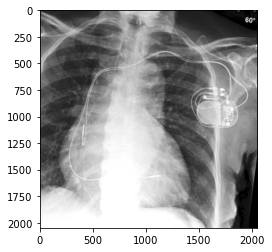

In [62]:
## for image-text-classification ##
p = 1
print(uid[p].item(), cap_lens[p].item())
print(caption[p, cap_mask[p]].tolist())
print(' '.join([idx2word[x.item()] for x in caption[p, cap_mask[p]]]))
print(label[p].tolist())
im1 = image[p,0,:,:].numpy()
plt.imshow(im1, cmap='gray')

In [103]:
# for masked LM ##
p = 0
print([x for x in zip(label[p].tolist(), caption[p, cap_mask[p]].tolist())])
# print(caption[p, cap_mask[p]])
print(' '.join([idx2word[x.item()] for x in caption[p, cap_mask[p]]]))
print(caption[p, cap_mask[p]])

[(-1, 1), (107, 8410), (-1, 258), (136, 8410), (-1, 22), (-1, 174), (40, 8410), (4, 8410), (-1, 124), (-1, 125), (-1, 209), (-1, 701), (-1, 107), (-1, 22), (-1, 29), (-1, 9), (-1, 10), (-1, 43), (-1, 393), (-1, 640), (-1, 189), (136, 136), (-1, 17), (-1, 40), (-1, 22), (-1, 80), (-1, 334), (-1, 61), (-1, 2538), (40, 4608), (-1, 341), (-1, 5), (-1, 61), (-1, 92), (22, 8410), (-1, 79), (-1, 93), (136, 8410), (-1, 219), (-1, 40), (22, 22), (-1, 220), (-1, 440), (-1, 60), (46, 8410), (635, 8410), (-1, 128), (-1, 107), (22, 8410), (-1, 23), (-1, 24), (96, 8410), (-1, 913), (-1, 40), (-1, 54), (-1, 287), (-1, 5), (-1, 447), (-1, 136), (-1, 989), (-1, 54), (-1, 476), (-1, 685), (-1, 167), (-1, 4), (-1, 5), (-1, 6), (-1, 129), (40, 8410), (-1, 47), (-1, 111), (-1, 11), (-1, 12), (-1, 2)]
[CLS] [MASK] comparison [MASK] the study [MASK] [MASK] has been further decrease in the left pleural effusion and basilar atelectatic changes with most of the hemidiaphragm well seen streak adiposity atelectas

In [105]:
p = 1
print(caption[p, label[p] != -1])
print(label[p][label[p]!=-1])

tensor([8410, 8410, 8410, 8410,  136, 4608, 8410, 8410,   22, 8410, 8410, 8410,
        8410, 8410])
tensor([107, 136,  40,   4, 136,  40,  22, 136,  22,  46, 635,  22,  96,  40])


In [104]:
## recover the original text
gt_token = caption[p].clone()
gt_token[label[p]!=-1] = label[p, label[p]!=-1]
print(' '.join([idx2word[x.item()] for x in gt_token[cap_mask[p]]]))

[CLS] in comparison with the study of there has been further decrease in the left pleural effusion and basilar atelectatic changes with most of the hemidiaphragm well seen streak of atelectasis is seen at the right base with blunting of the costophrenic angle again noted little change in the cardiomediastinal silhouette mild indistinctness of pulmonary vessels is consistent with elevated pulmonary venous pressure but there is no evidence of acute pneumonia or pneumothorax [SEP]


In [17]:
data_dir = '/media/MyDataStor2/MIMIC-CXR/'
with open(os.path.join(data_dir,'lm_reports/mimic_dataset_mit_normalized.pkl'),'rb') as f:
    datasets = pickle.load(f)

In [19]:
word2idx = datasets['word2idx']
idx2word = datasets['idx2word']

In [11]:
ipath = '/media/MyDataStor2/IPMI2021/output/MIMIC_test_2020_11_30_21_27_14/Model/text_encoder150.pth'
re.findall(r'\d+', os.path.basename(ipath))[-1]

'150'

## testing

In [20]:
from model import TextEncoder, ImageEncoder
from misc.config import Config
from transformers import BertConfig #, BertTokenizer
# from nltk.tokenize import RegexpTokenizer

cfg = Config()
bert_config = BertConfig(vocab_size=8410, hidden_size=512, num_hidden_layers=3,
                    num_attention_heads=8, intermediate_size=2048, hidden_act='gelu',
                    hidden_dropout_prob=cfg.hidden_dropout_prob, attention_probs_dropout_prob=cfg.attention_probs_dropout_prob,
                    max_position_embeddings=512, layer_norm_eps=1e-12,
                    initializer_range=0.02, type_vocab_size=2, pad_token_id=0)

In [21]:
text_encoder = TextEncoder(bert_config = bert_config)

In [36]:
text_encoder.train()

TextEncoder(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(8410, 512, padding_idx=0)
      (position_embeddings): Embedding(512, 512)
      (token_type_embeddings): Embedding(2, 512)
      (LayerNorm): LayerNorm((512,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.5, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=512, out_features=512, bias=True)
              (key): Linear(in_features=512, out_features=512, bias=True)
              (value): Linear(in_features=512, out_features=512, bias=True)
              (dropout): Dropout(p=0.05, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=512, out_features=512, bias=True)
              (LayerNorm): LayerNorm((512,), eps=1e-12, elementwise_affine=True)


In [38]:
text_encoder.bert.training

True

In [39]:
image_encoder = ImageEncoder(output_channels=cfg.hidden_dim)

In [40]:
image_encoder

ImageEncoder(
  (conv1): Conv2d(1, 8, kernel_size=(7, 7), stride=(4, 4), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (downsample): Sequential(
        (0): Conv2d(8, 16, kernel_size=(1, 1), stride=(2, 2), bias=False)
        (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (1): BasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      

In [43]:
image_encoder.conv1.weight.requires_grad #training

True

In [3]:
print('lr: %.4e' % 0.0001)

lr: 1.0000e-04


In [2]:
### dataset used for matching ###
data_dir = '/media/My1TBSSD1/MIMIC-CXR'
with open(os.path.join(data_dir, 'lm_reports/mimic_dataset_mit_normalized.pkl'), 'rb') as f:
        dataset = pickle.load(f)

In [3]:
dataset.keys() ### 50414267, 53189527, 53911762, 56699142, 57375967

dict_keys(['data_dict', 'data_split', 'word2idx', 'idx2word'])

In [14]:
print(len(dataset['data_split']['train_uids']))
print(len(dataset['data_split']['val_uids']))
print(len(dataset['data_split']['test_uids']))
print(len(dataset['data_split']['hold_uids']))

217252
2000
3000
3041


In [34]:
dataset['data_split']['hold_uids']

[50051329,
 51738740,
 53492798,
 56173345,
 57379357,
 57977208,
 52835225,
 50042142,
 50214117,
 50239281,
 51051449,
 51513702,
 51623828,
 51715880,
 51779078,
 52199665,
 53021891,
 53368667,
 53452091,
 53883066,
 54103072,
 54137212,
 54558182,
 54571214,
 54658698,
 54934220,
 55430988,
 55785509,
 55809473,
 56063579,
 57765703,
 57873452,
 57976739,
 58011676,
 58267855,
 58694539,
 59301985,
 53356050,
 56140866,
 58307391,
 59166131,
 50879902,
 51966612,
 52241282,
 52316568,
 52470229,
 52824884,
 53941324,
 54715839,
 56446284,
 56711198,
 57949791,
 58117612,
 58736291,
 59239338,
 53850317,
 56031350,
 56839020,
 57107868,
 59146650,
 59980986,
 50277921,
 50501762,
 51129150,
 51441976,
 52077644,
 52737492,
 52831202,
 53479699,
 53567394,
 54623776,
 55725911,
 55811525,
 56140154,
 56498272,
 56653253,
 56925922,
 52837403,
 54721755,
 54773340,
 56486000,
 56078456,
 59223989,
 51742525,
 52195893,
 53897449,
 55414814,
 59775769,
 50124332,
 55609649,
 56172325,

In [20]:
np.array(dataset['data_dict'][50414267]) ## check sample dict

array({'filenames': ['files/p10/p10000032/s50414267/02aa804e-bde0afdd-112c0b34-7bc16630-4e384014.dcm'], 'text': 'There is no focal consolidation , pleural effusion or pneumothorax . Bilateral nodular opacities that most likely represent nipple shadows . The cardiomediastinal silhouette is normal . Clips project over the left lung , potentially within the breast . The imaged upper abdomen is unremarkable . Chronic deformity of the posterior left NUMBER and NUMBER ribs are noted . No acute cardiopulmonary process .', 'split': 0, 'official_split': 0, 'token_ids': [1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 5, 25, 26, 27, 28, 22, 29, 30, 31, 32, 22, 33, 22, 34, 35, 36, 5, 37, 38, 39, 40, 22, 41, 29, 42, 43, 42, 44, 45, 46, 6, 47, 48, 49, 2]},
      dtype=object)

In [8]:
### dataset used for classification ###
data_dir = '/media/My1TBSSD1/MIMIC-CXR'
with open(os.path.join(data_dir, 'lm_reports/class_label_mit.pkl'), 'rb') as f:
        dataset2 = pickle.load(f)

In [21]:
dataset2.keys()

dict_keys(['label', 'split', 'image'])

In [16]:
print(len(dataset2['split']['train']))
print(len(dataset2['split']['val1']))
print(len(dataset2['split']['val2']))
print(len(dataset2['split']['test']))

217246
1999
3000
3041


In [63]:
pp = 52961869
print(np.array(dataset2['image'][pp]))
print(dataset2['label'][pp])

{'filenames': ['files/p15/p15110754/s52961869/4a52fd15-65b80b8e-84429afe-49c102fc-1c45957c.dcm'], 'text': 'Frontal and lateral views of the chest were obtained . The lungs are well expanded and clear , without focal consolidation , pleural effusion or pneumothorax . Pulmonary vasculature is engorged without overt pulmonary edema . Left pacemaker leads end in the expected locations of the right atrium and right ventricle . The heart is moderate enlarged . The aorta is tortuous , as described on the prior reports , but comparison can not be made in the absence of the prior images . Vascular congestion without overt pulmonary edema . No pneumonia .', 'split': 0, 'official_split': 0, 'token_ids': [1, 72, 43, 87, 88, 40, 22, 74, 256, 453, 22, 56, 45, 334, 494, 43, 57, 327, 7, 8, 9, 10, 11, 12, 54, 55, 5, 540, 327, 328, 54, 131, 29, 469, 1286, 1592, 107, 22, 449, 1071, 40, 22, 79, 779, 43, 79, 472, 22, 82, 5, 316, 267, 22, 318, 5, 321, 119, 530, 148, 22, 121, 2226, 167, 258, 793, 183, 180, 6

In [27]:
# 15% BERT masking
inp_mask = np.random.rand(*encoded_texts.shape) < 0.15
print(inp_mask)
# Do not mask special tokens
inp_mask[encoded_texts <= 3] = False
print(inp_mask)
# Set targets to -1 by default, it means ignore
labels = -1 * np.ones(encoded_texts.shape, dtype=int)
# Set labels for masked tokens
labels[inp_mask] = encoded_texts[inp_mask]
print(labels)

# Prepare input
encoded_texts_masked = np.copy(encoded_texts)
# Set input to [MASK] which is the last token for the 90% of tokens
# This means leaving 10% unchanged
inp_mask_2mask = inp_mask & (np.random.rand(*encoded_texts.shape) < 0.90)
encoded_texts_masked[
    inp_mask_2mask
] = 8410  # mask token is the last in the dict
print(encoded_texts_masked)
# Set 10% to a random token
inp_mask_2random = inp_mask_2mask & (np.random.rand(*encoded_texts.shape) < 1 / 9)
encoded_texts_masked[inp_mask_2random] = np.random.randint(
    4, 8410, inp_mask_2random.sum()
)
print(encoded_texts_masked)
# Prepare sample_weights to pass to .fit() method
sample_weights = np.ones(labels.shape)
sample_weights[labels == -1] = 0
print(sample_weights)
# y_labels would be same as encoded_texts i.e input tokens
y_labels = np.copy(encoded_texts)
print(y_labels)

[False False  True  True False False False False False False  True False
 False  True False False False False False False False False False False
 False False  True False False False False False False False  True False
 False  True  True  True False False False False False False False False
 False  True False False False False False False False]
[False False  True  True False False False False False False  True False
 False  True False False False False False False False False False False
 False False  True False False False False False False False  True False
 False  True  True  True False False False False False False False False
 False  True False False False False False False False]
[-1 -1  5  6 -1 -1 -1 -1 -1 -1 13 -1 -1 16 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 28 -1 -1 -1 -1 -1 -1 -1 22 -1 -1 36  5 37 -1 -1 -1 -1 -1 -1 -1 -1
 -1 44 -1 -1 -1 -1 -1 -1 -1]
[   1    4 8410 8410    7    8    9   10   11   12 8410   14   15 8410
   17   18   19   20   21   22   23   24    5   25   26   

In [89]:
dd = np.random.randint(0,10,(4,3,5))
dd

array([[[4, 4, 5, 4, 7],
        [2, 4, 9, 4, 9],
        [0, 0, 6, 9, 7]],

       [[2, 8, 1, 7, 7],
        [2, 4, 0, 7, 9],
        [5, 5, 2, 3, 9]],

       [[0, 6, 8, 5, 3],
        [4, 2, 1, 6, 7],
        [1, 7, 3, 7, 6]],

       [[6, 1, 0, 4, 2],
        [3, 2, 8, 5, 6],
        [7, 5, 2, 8, 8]]])

In [90]:
np.argmax(dd, axis=1)

array([[0, 0, 1, 2, 1],
       [2, 0, 2, 0, 1],
       [1, 2, 0, 2, 1],
       [2, 2, 1, 2, 2]])

In [91]:
p = np.array([0,1,2,3,4,5,6,7,8,9], dtype=int)
t = np.array([-1,-1,2,-1,1,-1,6,7,-1,5], dtype=int)
b = t != -1
acc = np.sum(p[b]==t[b]) / np.sum(b)
print(p)
print(t)
print(b)
print(acc)

[0 1 2 3 4 5 6 7 8 9]
[-1 -1  2 -1  1 -1  6  7 -1  5]
[False False  True False  True False  True  True False  True]
0.6


In [ ]:
#### testing the pretraining loading ####

In [22]:
from model_phrase_mlm import TextEncoder, ImageEncoder
from misc.config import Config
from transformers import BertConfig #, BertTokenizer

cfg = Config()

In [24]:
bert_config = BertConfig(vocab_size=8411, hidden_size=512, num_hidden_layers=3,
                    num_attention_heads=8, intermediate_size=2048, hidden_act='gelu',
                    hidden_dropout_prob=cfg.hidden_dropout_prob, attention_probs_dropout_prob=cfg.attention_probs_dropout_prob,
                    max_position_embeddings=512, layer_norm_eps=1e-12,
                    initializer_range=0.02, type_vocab_size=2, pad_token_id=0)

In [25]:
text_encoder = TextEncoder(bert_config = bert_config, output_channels=cfg.hidden_dim)

In [17]:
#### load pytorch model params (.pth) with different keys name ####
mlm_encoder_path = '/media/My1TBSSD1/IPMI2021/output/MIMIC_mlm_2021_02_24_19_58_21/Model/text_encoder.pth'
state_dict = torch.load(mlm_encoder_path, map_location='cpu')

In [37]:
## load checkpoint from MLM model ##
text_encoder.load_state_dict(state_dict['model'], strict=False)

_IncompatibleKeys(missing_keys=['bigram.weight', 'bigram.bias', 'norm.weight', 'norm.bias', 'trigram.weight', 'trigram.bias', 'sent_fc.weight', 'sent_fc.bias', 'word_fc.weight', 'word_fc.bias', 'bigram_fc.weight', 'bigram_fc.bias', 'trigram_fc.weight', 'trigram_fc.bias'], unexpected_keys=['transform.weight', 'transform.bias', 'LayerNorm.weight', 'LayerNorm.bias', 'mlm.weight', 'mlm.bias'])

In [97]:
txt_list = ['a1.x', 'a2.y', 'a3.z', 'b4.x', 'b5.y', 'b6.z', 'c7.x', 'c8.y', 'c9.z']
for x in txt_list:
    if ('a' not in x) and ('c' not in x):
        print(x)

b4.x
b5.y
b6.z


In [2]:
## few shot openi dataset

In [46]:
data_dir = '/home/ipmi/data/ChestXRay/dataset/'
img_dir = os.path.join(data_dir, 'images', 'images_normalized')
with open('/home/ipmi/data/ChestXRay/dataset/cleaned_dataset_v3.pickle','rb') as f:
    dataset = pickle.load(f)

In [47]:
dataset.keys()

dict_keys(['data_dict', 'data_split', 'word2idx', 'idx2word', 'classes', 'few_shot'])

In [48]:
dataset['few_shot'].keys()

dict_keys(['fewshot1', 'fewshot5', 'test1', 'test5'])

In [5]:
np.array(dataset['data_dict'][3750])

array({'filenames': ['3750_IM-1874-1001.dcm.png'], 'text': 'there is stable cardiomegaly. right pleural effusion is slightly increased in size. pulmonary vasculature is persistently enlarged. prominent interstitium is stable. no  focal infiltrate. no pneumothorax. visualized osseous structures intact.', 'split': 0, 'token_ids': [1, 4, 5, 152, 333, 79, 9, 10, 5, 354, 556, 107, 83, 54, 55, 5, 1533, 267, 379, 2066, 5, 152, 6, 7, 810, 6, 12, 171, 116, 117, 118, 2]},
      dtype=object)

In [6]:
dataset['classes'][3750]

['edema', 'cardiomegaly', 'effusion']

In [7]:
imgfile = os.path.join('/home/ipmi/data/ChestXRay/dataset/images/images_normalized', dataset['data_dict'][3750]['filenames'][0])
img = Image.open(imgfile)

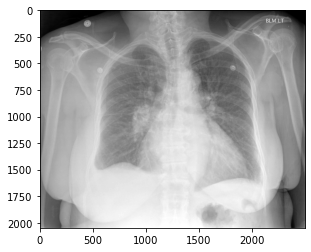

In [10]:
plt.imshow(img, cmap='gray')

In [9]:
iu_cls = {'no finding':8
            ,'edema':3
            ,'consolidation':2
            ,'pneumonia':11
            ,'pneumothorax':12
            ,'atelectasis':0
            ,'cardiomegaly':1
            ,'effusion':9}

iu_idx = {0:'atelectasis'
            ,1:'cardiomegaly'
            ,9:'effusion'
            ,3:'edema'
            ,2:'consolidation'
            ,11:'pneumonia'
            ,12:'pneumothorax'
            ,8:'no finding'}

In [26]:
## 5 shot
few_shot_5 = []

for k in list(iu_cls.keys()):
    few_shot_5.extend(np.random.choice([i for i in list(dataset['classes'].keys()) if k in dataset['classes'][i]], 5, replace=False).tolist())
    

In [30]:
for i in few_shot_5:
    print('%04d' % i, dataset['classes'][i])

1663 ['no finding']
0141 ['no finding']
2068 ['no finding']
0049 ['no finding']
2078 ['no finding']
2615 ['edema', 'cardiomegaly', 'effusion']
2055 ['edema', 'atelectasis', 'effusion']
2082 ['edema', 'cardiomegaly']
0353 ['edema', 'effusion']
1898 ['edema', 'cardiomegaly']
1740 ['consolidation']
0825 ['consolidation', 'atelectasis', 'cardiomegaly']
1422 ['consolidation', 'pneumonia']
3130 ['consolidation', 'cardiomegaly']
0394 ['consolidation']
1226 ['consolidation', 'pneumonia']
3895 ['pneumonia']
0268 ['pneumonia']
1430 ['pneumonia', 'atelectasis', 'effusion']
0945 ['consolidation', 'pneumonia', 'atelectasis']
3378 ['pneumothorax']
1326 ['pneumothorax']
3945 ['pneumothorax', 'atelectasis', 'atelectasis', 'effusion']
2482 ['pneumothorax', 'atelectasis']
1525 ['pneumothorax', 'atelectasis']
0418 ['atelectasis']
0535 ['atelectasis']
1919 ['atelectasis']
3241 ['atelectasis']
0455 ['atelectasis']
0847 ['cardiomegaly']
1053 ['atelectasis', 'cardiomegaly']
1204 ['cardiomegaly']
0910 ['cardi

In [32]:
test_few_shot_5 = list(dataset['classes'].keys())

for e in few_shot_5:
    test_few_shot_5.remove(e)


In [37]:
# 1 shot
few_shot_1 = []

for k in list(iu_cls.keys()):
    few_shot_1.append(np.random.choice([i for i in list(dataset['classes'].keys()) if k in dataset['classes'][i]]).tolist())


In [38]:
for i in few_shot_1:
    print('%04d' % i, dataset['classes'][i])

2179 ['no finding']
2657 ['edema', 'effusion']
0313 ['consolidation', 'effusion']
2207 ['pneumonia']
1021 ['pneumothorax', 'atelectasis']
1542 ['atelectasis']
1637 ['cardiomegaly']
3877 ['effusion']


In [39]:
test_few_shot_1 = list(dataset['classes'].keys())

for e in few_shot_1:
    test_few_shot_1.remove(e)

In [40]:
len(test_few_shot_1)

3658

In [41]:
few_shot = {'fewshot1': few_shot_1,
            'fewshot5': few_shot_5,
            'test1': test_few_shot_1,
            'test5': test_few_shot_5}

dataset['few_shot'] = few_shot

In [44]:
data_dir = '/home/ipmi/data/ChestXRay/dataset/'
img_dir = os.path.join(data_dir, 'images', 'images_normalized')

with open('/home/ipmi/data/ChestXRay/dataset/cleaned_dataset_v3.pickle','wb') as f:
    pickle.dump(dataset, f)

In [50]:
cc = np.array([0.9854,
                0.9624,
                0.975,
                0.9490,
                0.9784,
                0.9894,
                0.9713])
wt = np.array([315,
                40,
                28,
                36,
                293,
                22,
                140])

# cc @ (wt / wt.sum())
cc.mean()

0.9729857142857143

In [ ]:
# 1
atelectasis: 0.9703
cardiomegaly: 0.9867
consolidation: 0.9755
edema: 0.9679
no finding: 0.9404
effusion: 0.9712
pneumonia: 0.9449
pneumothorax: 0.9800
Avg: 0.9709
wAvg: 0.9758
    
# 2
atelectasis: 0.9759
cardiomegaly: 0.9863
consolidation: 0.9738
edema: 0.9652
no finding: 0.9528
effusion: 0.9714
pneumonia: 0.9473
pneumothorax: 0.9791
Avg: 0.9713
wAvg: 0.9775
    
# 3
atelectasis: 0.9784
cardiomegaly: 0.9854
consolidation: 0.9716
edema: 0.9624
no finding: 0.9608
effusion: 0.9713
pneumonia: 0.9490
pneumothorax: 0.9784
Avg: 0.9709
wAvg: 0.9779
    
# 4
atelectasis: 0.9798
cardiomegaly: 0.9844
consolidation: 0.9691
edema: 0.9599
no finding: 0.9662
effusion: 0.9712
pneumonia: 0.9485
pneumothorax: 0.9783
Avg: 0.9702
wAvg: 0.9778
    
# 5
atelectasis: 0.9806
cardiomegaly: 0.9834
consolidation: 0.9668
edema: 0.9574
no finding: 0.9691
effusion: 0.9712
pneumonia: 0.9481
pneumothorax: 0.9784
Avg: 0.9694
wAvg: 0.9775
    
# 6
atelectasis: 0.9811
cardiomegaly: 0.9825
consolidation: 0.9644
edema: 0.9556
no finding: 0.9706
effusion: 0.9714
pneumonia: 0.9467
pneumothorax: 0.9787
Avg: 0.9686
wAvg: 0.9772
    
# 7
atelectasis: 0.9814
cardiomegaly: 0.9816
consolidation: 0.9619
edema: 0.9545
no finding: 0.9714
effusion: 0.9716
pneumonia: 0.9451
pneumothorax: 0.9789
Avg: 0.9678
wAvg: 0.9768